In [ ]:
# importing some libraries (not all are currently used)

import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import time

from PIL import Image
import imageio
import cv2
import tensorflow as tf
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from torch.utils.data import DataLoader
import numpy as np
import pandas as pd
import os
from PIL import Image

import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from tqdm import tqdm  # For progress bar

import random

# connecting drive
from google.colab import drive
drive.mount('/content/drive')

# change to project directory
%cd /content/drive/My\ Drive/Fantasy\ Football

Mounted at /content/drive
/content/drive/My Drive/Fantasy Football


In [ ]:
df = pd.read_csv('footballguys_qb_stats_2000_2022.csv')

In [ ]:
df.sample(5)

,Rank,Name,Age,Exp,G,Cmp,Att,Cm%,PYd,Y/Att,PTD,Int,Rsh,RshYd,RshTD,FP/G,FantPt,Year
1306,31,Brett Hundley GB,24.0,3.0,11,192,316,60.8,1836,5.81,9,12,36,270,2,11.4,125.4,2017
1499,2,Kyler Murray ARI,23.0,2.0,16,375,558,67.2,3971,7.12,26,12,133,819,11,24.2,386.7,2020
1401,51,Nathan Peterman BUF,24.0,2.0,4,44,81,54.3,297,3.67,1,7,10,49,1,3.2,12.8,2018
521,66,Kellen Clemens NYJ,23.0,1.0,2,0,1,0.0,0,0.00,0,0,2,10,0,0.5,1.0,2006
1468,44,Brandon Allen DEN,27.0,4.0,3,39,84,46.4,515,6.13,3,2,10,39,0,10.8,32.5,2019


<Axes: ylabel='Frequency'>

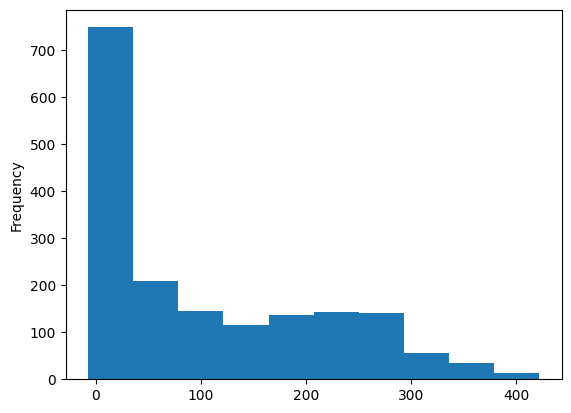

In [ ]:
df['FantPt'].plot(kind='hist')

In [ ]:
df_cleaned = df.dropna()

In [ ]:
columns_to_exclude = ['Rank', 'Name', 'FantPt']

# Create DataFrame X excluding specified columns
X = df_cleaned.drop(columns=columns_to_exclude)
Y = df_cleaned['FantPt']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.01, random_state=42)

In [ ]:
X_train.head()

,Age,Exp,G,Cmp,Att,Cm%,PYd,Y/Att,PTD,Int,Rsh,RshYd,RshTD,FP/G,Year
190,37.0,15.0,8,103,161,64.0,1023,6.35,4,4,10,32,0,6.5,2002
49,29.0,6.0,3,47,82,57.3,382,4.66,1,1,7,5,0,5.9,2000
1197,29.0,7.0,2,2,2,100.0,4,2.00,0,0,2,-2,0,-0.0,2015
1064,26.0,3.0,16,392,590,66.4,4032,6.83,27,12,55,317,1,17.7,2014
1117,24.0,2.0,2,4,5,80.0,60,12.00,0,0,2,-3,0,1.0,2014


In [ ]:
df_2023 = pd.read_csv('footballguys_qb_stats_2023.csv').dropna()

In [ ]:
df_2023.head()

,Rank,Name,Age,Exp,G,Cmp,Att,Cm%,PYd,Y/Att,PTD,Int,Rsh,RshYd,RshTD,FP/G,FantPt,Year
0,1,Josh Allen BUF,27,6,16,355,541,65.6,3947,7.30,27,16,96,457,15,23.1,369.6,2023
1,2,Jalen Hurts PHI,25,4,16,345,522,66.1,3803,7.29,23,14,155,601,15,22.9,366.2,2023
2,3,Lamar Jackson BAL,26,6,16,307,457,67.2,3678,8.05,24,7,148,821,5,21.3,341.2,2023
3,4,Dak Prescott DAL,30,8,16,379,554,68.4,4237,7.65,32,8,55,242,2,19.9,317.7,2023
4,5,Jordan Love GB,25,4,16,345,547,63.1,3843,7.03,30,11,47,248,4,18.8,300.5,2023


In [ ]:
X_test = df_2023.drop(columns=columns_to_exclude)
Y_test = df_2023['FantPt']

In [ ]:
X_test.head()

,Age,Exp,G,Cmp,Att,Cm%,PYd,Y/Att,PTD,Int,Rsh,RshYd,RshTD,FP/G,Year
0,27,6,16,355,541,65.6,3947,7.30,27,16,96,457,15,23.1,2023
1,25,4,16,345,522,66.1,3803,7.29,23,14,155,601,15,22.9,2023
2,26,6,16,307,457,67.2,3678,8.05,24,7,148,821,5,21.3,2023
3,30,8,16,379,554,68.4,4237,7.65,32,8,55,242,2,19.9,2023
4,25,4,16,345,547,63.1,3843,7.03,30,11,47,248,4,18.8,2023


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# Predict values for the test set
y_pred = model.predict(X_test)

In [135]:
# Calculate metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(Y_test, y_pred)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 0.26
Mean Squared Error (MSE): 0.15
Root Mean Squared Error (RMSE): 0.39
R-squared (R2): 1.00


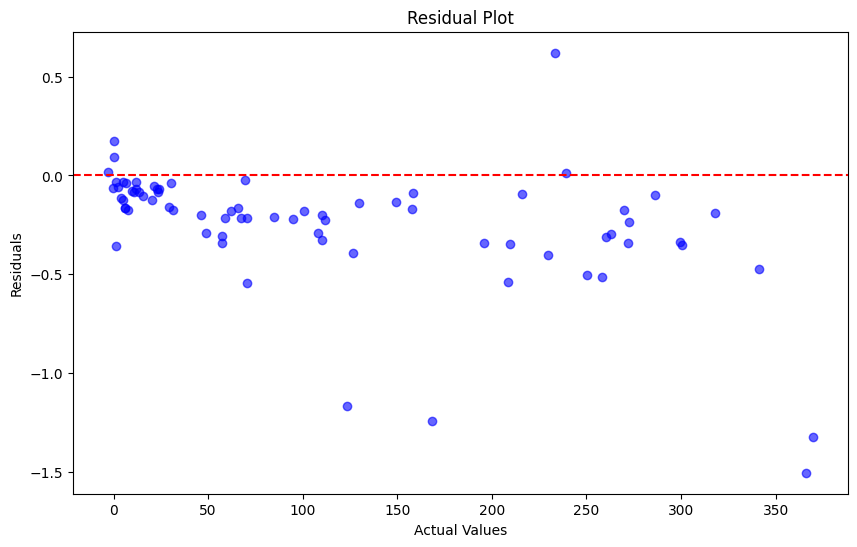

In [123]:
# Calculate residuals
residuals = Y_test - y_pred

# Create scatter plot of actual vs residuals
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, residuals, color='blue', alpha=0.6)

# Add a horizontal line at zero for reference
plt.axhline(y=0, color='red', linestyle='--')

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# Show the plot
plt.show()

In [138]:
# Select a random index from the test set
random_index = random.randint(0, len(X_test) - 1)
# Get the actual and predicted values for the random data point
actual_value = Y_test.iloc[random_index]
predicted_value = model.predict([X_test.iloc[random_index]])[0]

# Print the actual vs predicted value
print(f"Name of the player: {df_2023.iloc[random_index]['Name']}")
print(f"Actual FantPt: {actual_value:.2f}")
print(f"Predicted FantPt: {predicted_value:.2f}")

Name of the player: Brock Purdy SF
Actual FantPt: 299.60
Predicted FantPt: 299.94


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


KeyError: 70

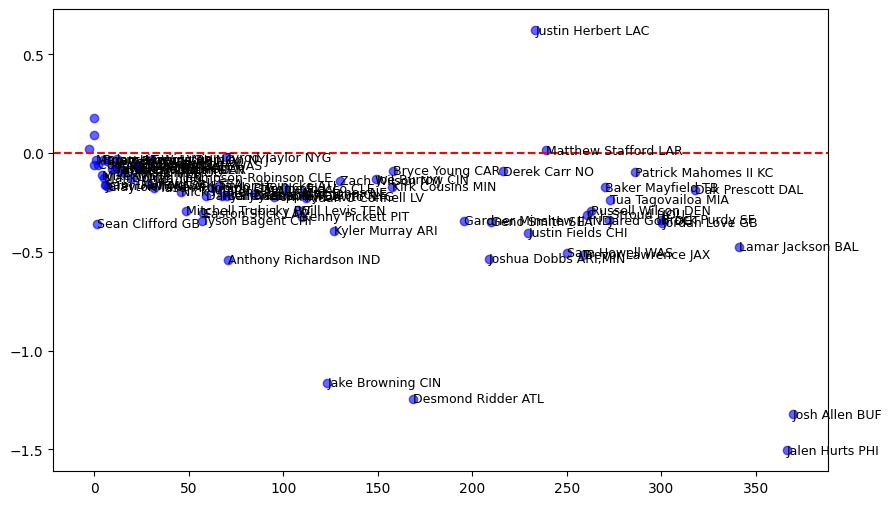

In [141]:
# Example of players list (replace with actual player names corresponding to Y_test)
players = df_2023['Name']  # Replace with your player names

# Create scatter plot of actual vs residuals
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, residuals, color='blue', alpha=0.6)

# Add a horizontal line at zero for reference
plt.axhline(y=0, color='red', linestyle='--')

# Add player names as annotations
for i in range(len(Y_test)):
    plt.text(Y_test.iloc[i], residuals.iloc[i], players[i], fontsize=9, verticalalignment='center')

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot with Player Names')

# Show the plot
plt.tight_layout()
plt.show()
